<a href="https://colab.research.google.com/github/waadALMASRI/Generative-Adversarial-Network/blob/master/Design_Generation_GAN_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install tensorflow==2.3.0

In [2]:
ls

create_dataset.py  data/  discriminator.py  generator.py


In [3]:
import tensorflow as tf
import os
import time
from create_dataset import load_data
from generator import initialize_generator_weights, generator, generator_loss
from discriminator import initialize_discriminator_weights, discriminator, discriminator_loss
from IPython import display
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.3.0'

Network Parameters

In [5]:
learning_rate = 1e-5#0.0002
BATCH_SIZE = 32

In [6]:
ROOT_PATH = "./data/"
train_data_directory = os.path.join(ROOT_PATH, "train/")

images_train = load_data(train_data_directory)
train_dataset = tf.data.Dataset.from_tensor_slices(images_train).shuffle(5000).batch(BATCH_SIZE)

In [24]:
images_train.shape

(80, 100, 100, 1)

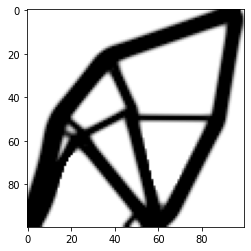

In [7]:
plt.imshow(images_train[0, :, :, 0], cmap='gray')

In [8]:
weights_d, biases_d = initialize_discriminator_weights(nf = 32)
weights_g, biases_g = initialize_generator_weights(nf = 32)

In [9]:
generator_optimizer = tf.optimizers.Adam(learning_rate)
discriminator_optimizer = tf.optimizers.Adam(learning_rate)

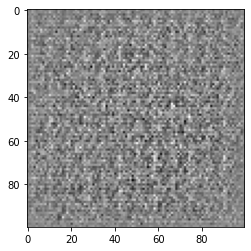

In [10]:
noise = tf.random.normal([2,100])
generated_image = generator(noise, weights_g, biases_g )

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [11]:
32*.75

24.0

In [12]:
def train_step(images):
    batch_size = images.shape[0]
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, weights_g, biases_g)

        real_output = discriminator(images, weights_d, biases_d)
        fake_output = discriminator(generated_images, weights_d, biases_d)
        print()
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        generator_trainable_variables = list(weights_g.values()) + list(biases_g.values())
        gradients_of_generator = gen_tape.gradient(gen_loss, generator_trainable_variables)
        discriminator_trainable_variables = list(weights_d.values()) + list(biases_d.values())
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator_trainable_variables)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator_trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator_trainable_variables))
    return gen_loss, disc_loss

In [16]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, weights_g, biases_g)

    fig = plt.figure(figsize=(4,4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    # plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [20]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()

        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
        print ('gen_loss:{} - disc_loss:{} - Time for epoch {} is {} sec'.format(gen_loss, disc_loss, epoch + 1, time.time()-start))
        # Produce images for the GIF as we go
        # to visualize progress in the animated GIF)
        # seed = tf.random.normal([16, 100])
        # display.clear_output(wait=True)
        # generate_and_save_images(generator,
        #                          epoch + 1,
        #                          seed)
        
    # Generate after the final epoch
    # display.clear_output(wait=True)
    # generate_and_save_images(generator,
    #                        epochs,
    #                        seed)

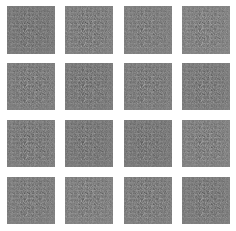

In [23]:
seed = tf.random.normal([16, 100])
generate_and_save_images(generator,
                           100,
                           seed)

In [21]:
train(train_dataset, epochs=100)

NameError: ignored

In [ ]:
gen_loss, disc_loss